In [1]:
import torch
import torch.nn as nn 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [3]:
torch.manual_seed(78) 
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [4]:
y = 2*X + 1 + e
print(y.shape)

torch.Size([50, 1])


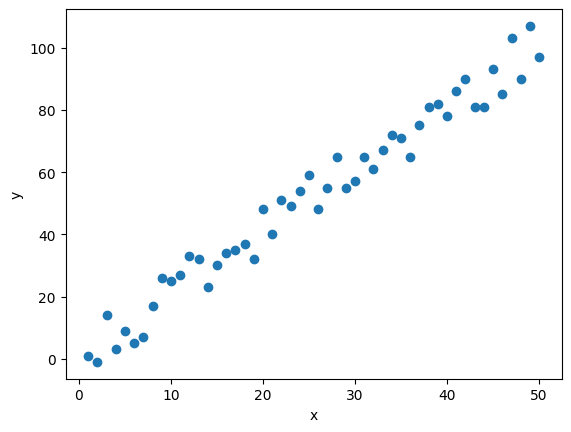

In [5]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [6]:
torch.manual_seed(59)

model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [7]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [8]:
torch.manual_seed(59)
model = Model(1, 1)
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: 0.10597813129425049
Bias:   0.9637961387634277


In [9]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [10]:
x = torch.tensor([2.0])
print(model.forward(x))  

tensor([1.1758], grad_fn=<ViewBackward0>)


In [11]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [12]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: 0.10597813, Initial bias: 0.96379614

[1.0697743 6.2627025]


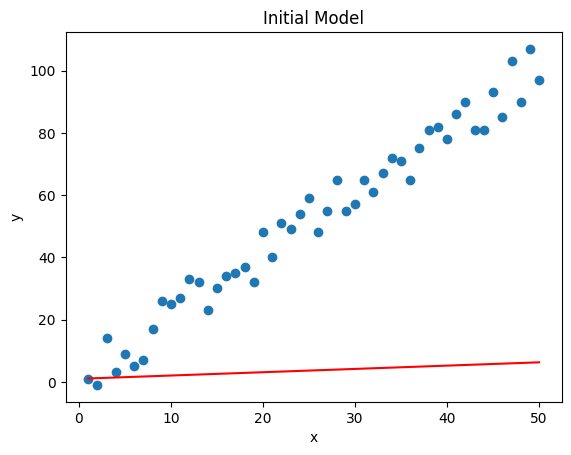

In [14]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

In [15]:
criterion = nn.MSELoss()

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [17]:
epochs = 50
losses = []

for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    
    print(f'Epoch: {i:2}  Loss: {loss.item():10.8f}  Weight: {model.linear.weight.item():10.8f}  Bias: {model.linear.bias.item():10.8f}') 
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch:  1  Loss: 3107.66723633  Weight: 0.10597813  Bias: 0.96379614
Epoch:  2  Loss: 1617.38110352  Weight: 3.35858059  Bias: 1.06046367
Epoch:  3  Loss: 847.99829102  Weight: 1.02153397  Bias: 0.99105513
Epoch:  4  Loss: 450.79342651  Weight: 2.70073628  Bias: 1.04097474
Epoch:  5  Loss: 245.73083496  Weight: 1.49420226  Bias: 1.00515521
Epoch:  6  Loss: 139.86422729  Weight: 2.36111403  Bias: 1.03094053
Epoch:  7  Loss: 85.20918274  Weight: 1.73822331  Bias: 1.01246178
Epoch:  8  Loss: 56.99272156  Weight: 2.18577838  Bias: 1.02578747
Epoch:  9  Loss: 42.42555618  Weight: 1.86420178  Bias: 1.01626122
Epoch: 10  Loss: 34.90506363  Weight: 2.09525800  Bias: 1.02315438
Epoch: 11  Loss: 31.02250481  Weight: 1.92923903  Bias: 1.01824987
Epoch: 12  Loss: 29.01806641  Weight: 2.04852486  Bias: 1.02182221
Epoch: 13  Loss: 27.98325157  Weight: 1.96281481  Bias: 1.01930380
Epoch: 14  Loss: 27.44901848  Weight: 2.02439737  Bias: 1.02116168
Epoch: 15  Loss: 27.17320633  Weight: 1.98014784  Bias

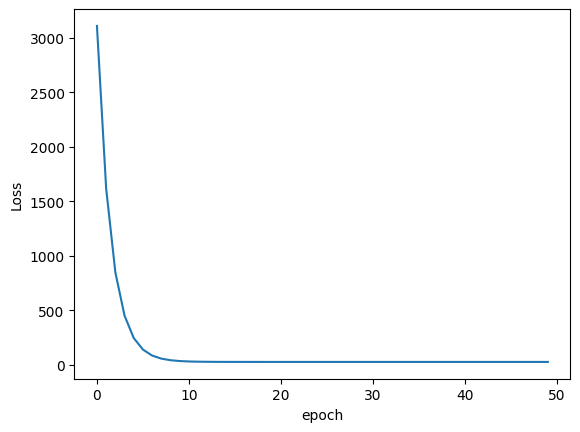

In [18]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [19]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f"Current weight: {w1:.8f}, Current bias: {b1:.8f}")
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.99861836, Current bias: 1.02142739

[ 1. 50.]
[  3.0200458 100.95235  ]


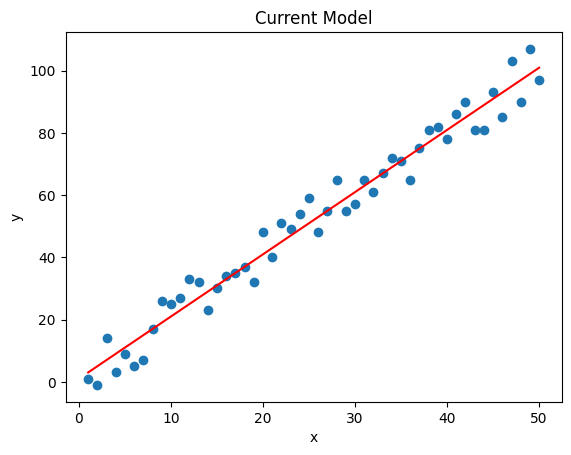

In [20]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');